In [2]:
#importing libraries
import requests 
import pandas as pd 
import numpy as np 
import random 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
from IPython.display import Image 
from IPython.core.display import HTML   
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
import folium 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.21.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.21.0         | 58 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages

In [25]:
CLIENT_ID = 'RY4GXQCMLJKDIQYWPNLQVAL0WBJ3OGZ2F5ZZMJ2TWO3LKPMJ' 
CLIENT_SECRET = 'JQL3X0R1ZLIM0SMDC42LLFKVDSEZPNVW0XLDKCNELWIIIDMW' 
VERSION = '20180604'
LIMIT = 5000000

In [26]:
latitude = 36.452680
longitude =  28.220323

In [45]:
search_query = 'Hotel'
radius = 400
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
hotels = requests.get(url1).json()
vn1= hotels['response']['venues']
df1 = json_normalize(vn1)


In [46]:
search_query = 'Restaurant'
radius = 400
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
restaurants = requests.get(url2).json()
vn2= restaurants['response']['venues']
df2 = json_normalize(vn2)

In [47]:
search_query = 'Cafe'
radius = 400
url3 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
cafe = requests.get(url3).json()
vn3= cafe['response']['venues']
df3 = json_normalize(vn3)

In [48]:
filtered_columns = ['name', 'categories'] + [col for col in df1.columns if col.startswith('location.')] + ['id']
dff1 = df1.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
dff1['categories'] = dff1.apply(get_category_type, axis=1)
dff1.columns = [column.split('.')[-1] for column in dff1.columns]

In [49]:
filtered_columns = ['name', 'categories'] + [col for col in df2.columns if col.startswith('location.')] + ['id']
dff2 = df2.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
dff2['categories'] = dff2.apply(get_category_type, axis=1)
dff2.columns = [column.split('.')[-1] for column in dff2.columns]

In [50]:
filtered_columns = ['name', 'categories'] + [col for col in df3.columns if col.startswith('location.')] + ['id']
dff3 = df3.loc[:, filtered_columns]
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
dff3['categories'] = dff3.apply(get_category_type, axis=1)
dff3.columns = [column.split('.')[-1] for column in dff3.columns]

In [51]:
rmap = folium.Map(location=[latitude, longitude], zoom_start=15)
for lat, lng, label in zip(dff1.lat, dff1.lng, dff1.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(rmap)


for lat, lng, label in zip(dff2.lat, dff2.lng, dff2.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(rmap)
    

for lat, lng, label in zip(dff3.lat, dff3.lng, dff3.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(rmap)
    
rmap

In [52]:
x= dff1.name.count()
y= dff2.name.count()
z= dff3.name.count()

In [68]:
data = {'Number':[x,y,z]}
df = pd.DataFrame(data, index=['Hotels','Restaurants','Cafe'])
df

,Number
Hotels,50
Restaurants,31
Cafe,29


In [81]:
df4=df.transpose()
df4

,Hotels,Restaurants,Cafe
Number,50,31,29


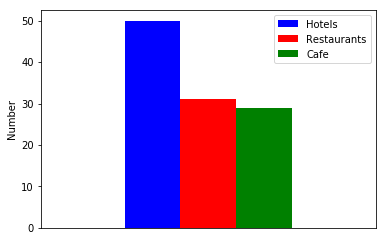

In [91]:
import matplotlib.pyplot as plt

df4.plot(kind ='bar', color=['blue', 'red', 'green'])
plt.ylabel('Number')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)

In [ ]:
#we can see that the difference in the number of restaurants and cafe is quiet small. So any investor probably will have the same profit, though could be a bit better to open a cafe.